In [3]:
import json
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [4]:
# Load the dictionary from the JSON file
json_file = 'data&labels.json'
with open(json_file, 'r') as f:
    image_dict = json.load(f)

# Load images and labels from the dictionary
image_paths, labels = zip(*image_dict.items())

# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Load images and resize them to a fixed size
images = []
for image_path in image_paths:
    img = cv2.imread(image_path)
    img = cv2.resize(img, (100, 100))  # Resize to 100x100 (adjust as needed)
    images.append(img)

images = np.array(images)

In [3]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')  # Assuming 5 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/10


2024-04-22 10:39:49.861033: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


26/26 [==============================] - 2s 78ms/step - loss: 1.5636 - accuracy: 0.3046 - val_loss: 1.4418 - val_accuracy: 0.3738
Epoch 2/10
26/26 [==============================] - 2s 75ms/step - loss: 1.3151 - accuracy: 0.4575 - val_loss: 1.3106 - val_accuracy: 0.4854
Epoch 3/10
26/26 [==============================] - 2s 75ms/step - loss: 1.0206 - accuracy: 0.6092 - val_loss: 1.2952 - val_accuracy: 0.4320
Epoch 4/10
26/26 [==============================] - 2s 75ms/step - loss: 0.7201 - accuracy: 0.7367 - val_loss: 1.6411 - val_accuracy: 0.4369
Epoch 5/10
26/26 [==============================] - 2s 73ms/step - loss: 0.5116 - accuracy: 0.8058 - val_loss: 1.6062 - val_accuracy: 0.4709
Epoch 6/10
26/26 [==============================] - 2s 73ms/step - loss: 0.2717 - accuracy: 0.9114 - val_loss: 1.7679 - val_accuracy: 0.4757
Epoch 7/10
26/26 [==============================] - 2s 74ms/step - loss: 0.1452 - accuracy: 0.9575 - val_loss: 2.0314 - val_accuracy: 0.4709
Epoch 8/10
26/26 [======

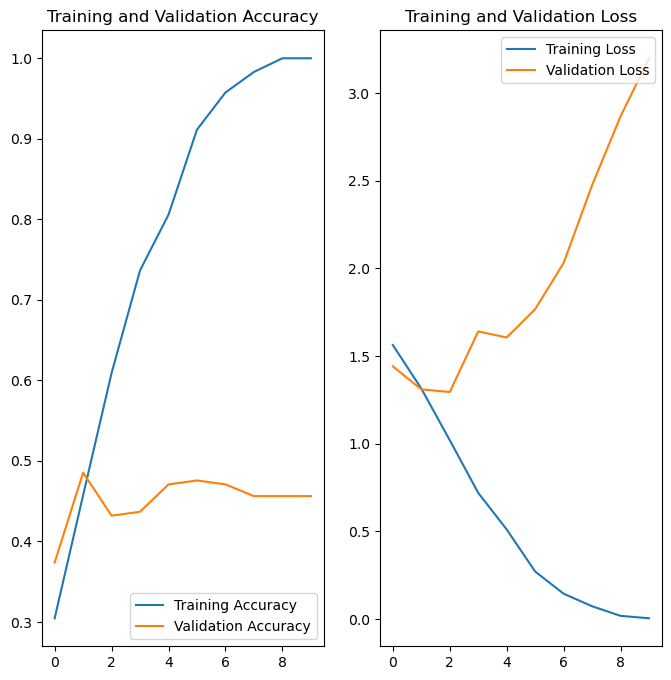

In [4]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [5]:
# Load the ResNet-50 model with pre-trained ImageNet weights
base_model = ResNet50(weights='imagenet', include_top=False)

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a new output layer for the number of dog breeds (5 in this case)
predictions = Dense(5, activation='softmax')(x)

# Create a new model with the modified base model
model_2 = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model_2.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on your dataset
history_2 = model_2.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Evaluate the model
loss_2, accuracy_2 = model_2.evaluate(X_test, y_test)
print(f'Loss: {loss_2}, Accuracy: {accuracy_2}')

Epoch 1/20
26/26 [==============================] - 8s 290ms/step - loss: 1.7073 - accuracy: 0.2282 - val_loss: 1.6288 - val_accuracy: 0.2233
Epoch 2/20
26/26 [==============================] - 7s 288ms/step - loss: 1.5859 - accuracy: 0.2464 - val_loss: 1.5844 - val_accuracy: 0.2670
Epoch 3/20
26/26 [==============================] - 7s 282ms/step - loss: 1.5538 - accuracy: 0.3167 - val_loss: 1.6059 - val_accuracy: 0.1748
Epoch 4/20
26/26 [==============================] - 7s 275ms/step - loss: 1.5382 - accuracy: 0.3180 - val_loss: 1.5641 - val_accuracy: 0.2913
Epoch 5/20
26/26 [==============================] - 7s 278ms/step - loss: 1.5249 - accuracy: 0.3167 - val_loss: 1.5695 - val_accuracy: 0.3010
Epoch 6/20
26/26 [==============================] - 7s 279ms/step - loss: 1.5098 - accuracy: 0.3265 - val_loss: 1.5186 - val_accuracy: 0.3495
Epoch 7/20
26/26 [==============================] - 7s 281ms/step - loss: 1.4890 - accuracy: 0.3580 - val_loss: 1.5462 - val_accuracy: 0.2913
Epoch 

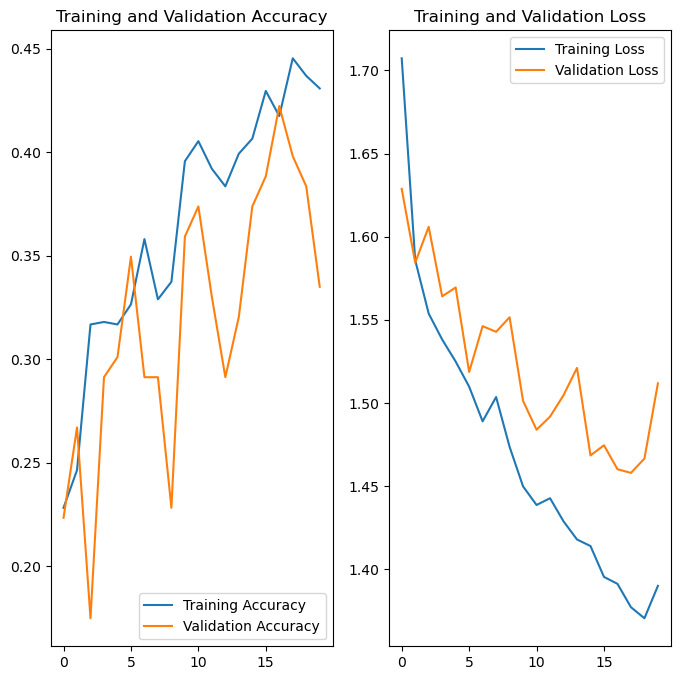

In [7]:
acc_2 = history_2.history['accuracy']
val_acc_2 = history_2.history['val_accuracy']

loss_2 = history_2.history['loss']
val_loss_2 = history_2.history['val_loss']

epochs_range_2 = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range_2, acc_2, label='Training Accuracy')
plt.plot(epochs_range_2, val_acc_2, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range_2, loss_2, label='Training Loss')
plt.plot(epochs_range_2, val_loss_2, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [5]:
# Load the VGG16 model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

# Extract features using the VGG16 model
features = vgg_model.predict(preprocess_input(images.copy()))

# Reshape features to a 2D array
features = features.reshape(features.shape[0], -1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Define the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Define a pipeline for the logistic regression model
pipeline = Pipeline([
    ('logreg', logreg)
])

# Define hyperparameters for grid search
param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

2024-04-24 10:14:16.570991: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


33/33 [==============================] - 16s 491ms/step


In [6]:
# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model
accuracy = grid_search.score(X_test, y_test)
print("Accuracy:", accuracy)

Best hyperparameters: {'logreg__C': 0.001}
Accuracy: 0.8737864077669902


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[5 5 5]
  [2 2 2]
  [3 5 5]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 2 2]
  [2 2 2]
  [2 4 4]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[2 2 2]
  [2 2 2]
  [3 3 3]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...


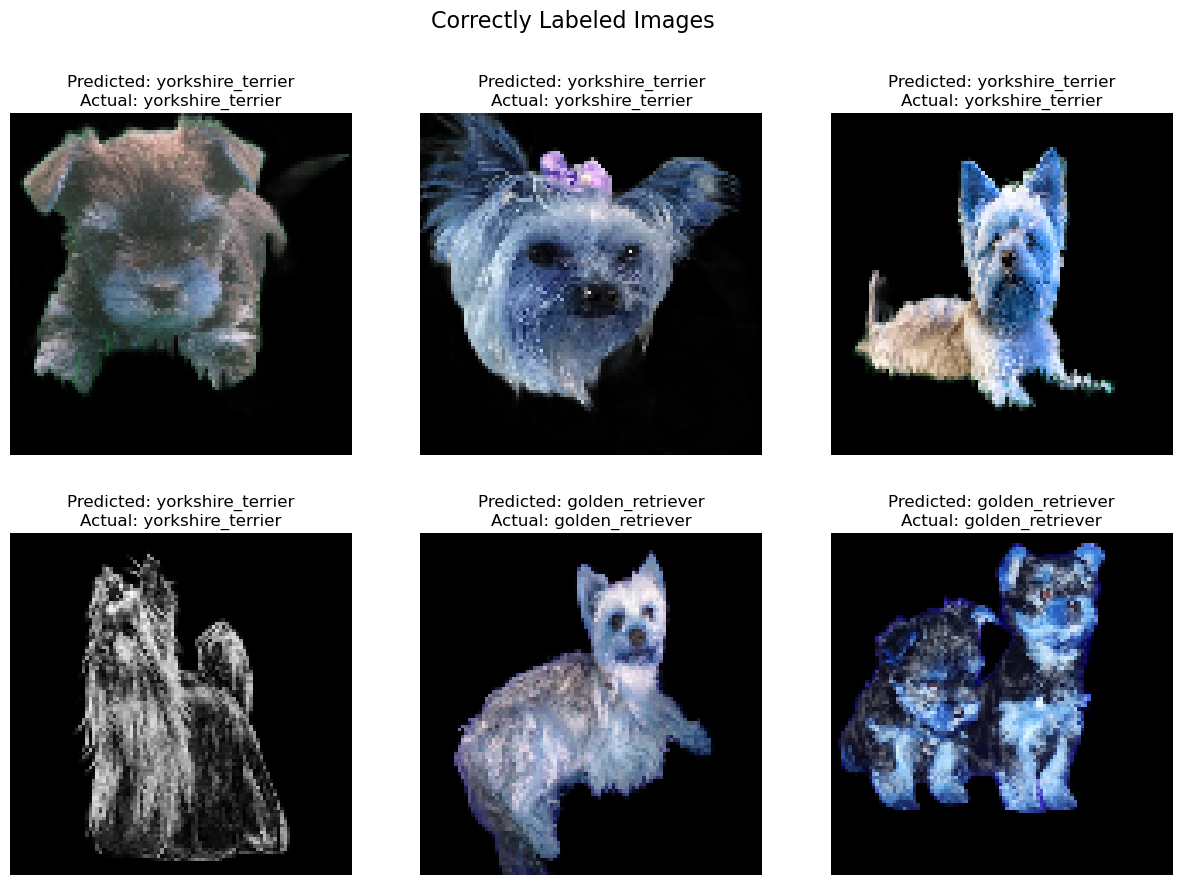

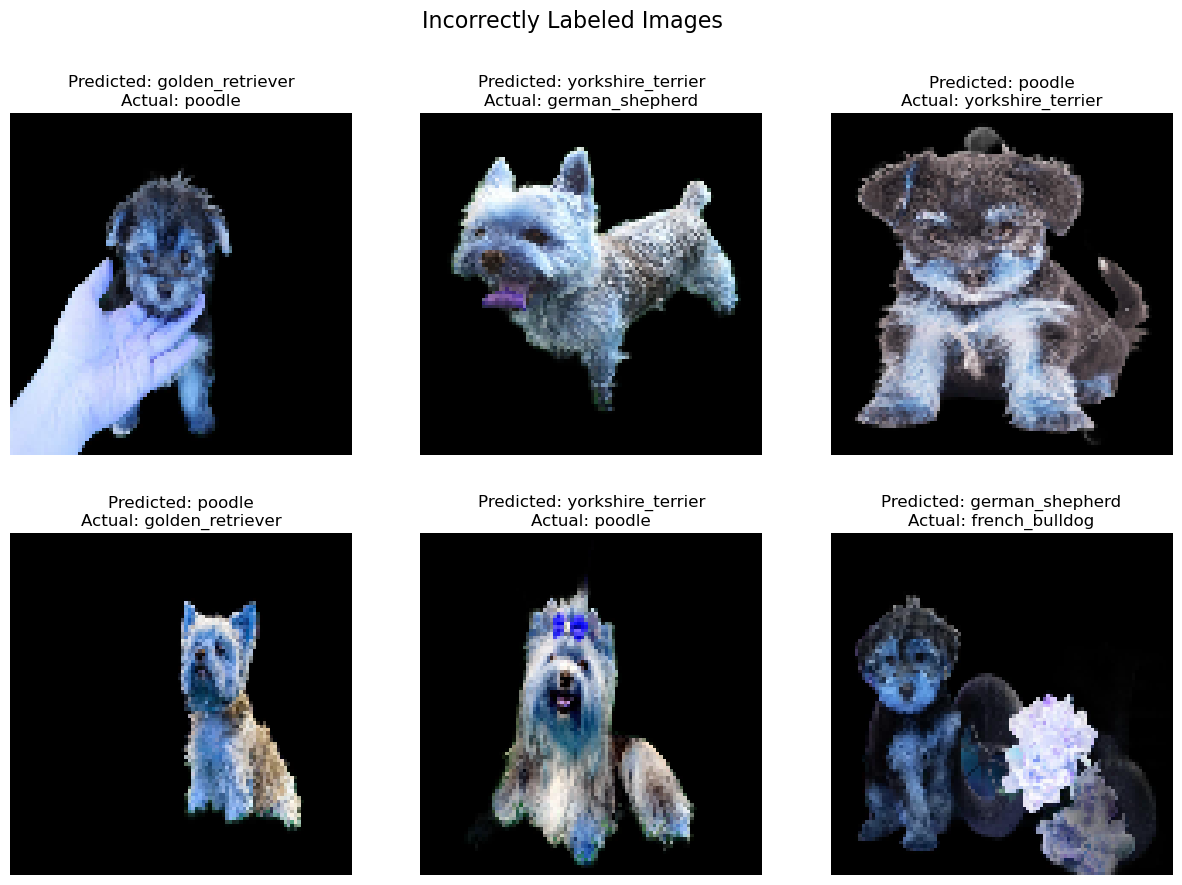

In [7]:
# Predict labels for the test set
y_pred = grid_search.predict(X_test)

# Find indices of correctly and incorrectly labeled images
correct_indices = np.where(y_pred == y_test)[0]
incorrect_indices = np.where(y_pred != y_test)[0]

# Display some correctly labeled images
plt.figure(figsize=(15, 10))
plt.suptitle('Correctly Labeled Images', fontsize=16)
for i, idx in enumerate(correct_indices[:6]):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[idx])
    print(images[idx])
    plt.axis('off')
    plt.title(f'Predicted: {label_encoder.inverse_transform([y_pred[idx]])[0]}\nActual: {label_encoder.inverse_transform([y_test[idx]])[0]}')
plt.show()

# Display some incorrectly labeled images
plt.figure(figsize=(15, 10))
plt.suptitle('Incorrectly Labeled Images', fontsize=16)
for i, idx in enumerate(incorrect_indices[:6]):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[idx])
    plt.axis('off')
    plt.title(f'Predicted: {label_encoder.inverse_transform([y_pred[idx]])[0]}\nActual: {label_encoder.inverse_transform([y_test[idx]])[0]}')
plt.show()